In [55]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

# Abstract

## The goal of this study is to predict if a person is more likely to buy a travel insurance based on factors such age,employment type, graduate, annual income, number of family members, chronic diseases, frequent flyer and ever travelled abroad. The study includes analysis of the variables, pre-processing of the data and also prediction based on SVM, KNN and Random Forest algorithm.


# Introduction

## Based on our intuition, we are expecting factors such as annual income, frequent flyers, and employment type will have high correlation with travel insurance purchase. For example, people with higher income will be more likely to buy travel insurance compared to people with lower income. 

# Data 

## Datasets

### Dataset that we use in this study is based on travel insurance data obtained from kaggle. The content of the dataset are as follows: <br> <br>Age- Age Of The Customer<br> Employment Type- The Sector In Which Customer Is Employed<br>  GraduateOrNot- Whether The Customer Is College Graduate Or Not<br>  AnnualIncome- The Yearly Income Of The Customer<br>  FamilyMembers- Number Of Members In Customer's Family <br> ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.<br> FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019]<br> EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country <br> TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.



## Data preparation

In [56]:
data = pd.read_csv('TravelInsurancePrediction.csv')

In [57]:
data.shape

(1987, 10)

In [58]:
data.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [59]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [60]:
data.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64

In [61]:
## REPORT
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [62]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [63]:
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [64]:
data.drop('Unnamed: 0',axis=1,inplace=True)

# Analysis

## Univariate Analysis

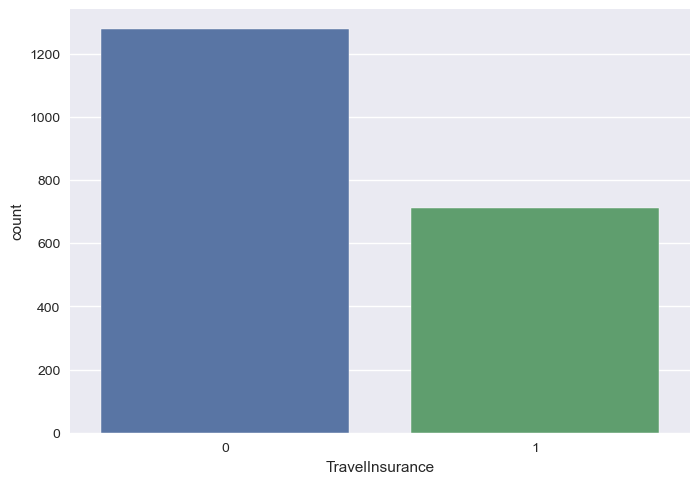

In [65]:
sns.set_style('darkgrid')
sns.countplot(data=data,x='TravelInsurance')
plt.show()

#more no-buys than buys

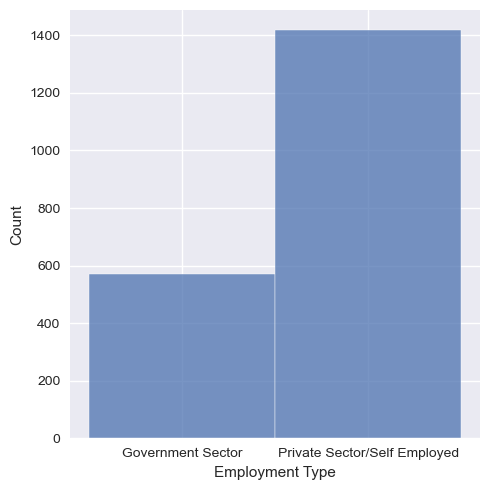

In [66]:
sns.displot(data['Employment Type'])
plt.show()

#skewed towards private sector/self employed

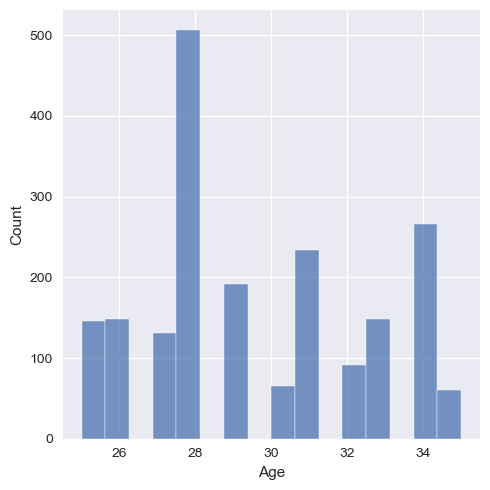

In [67]:
#Age EDA
sns.displot(data['Age'])
plt.show()

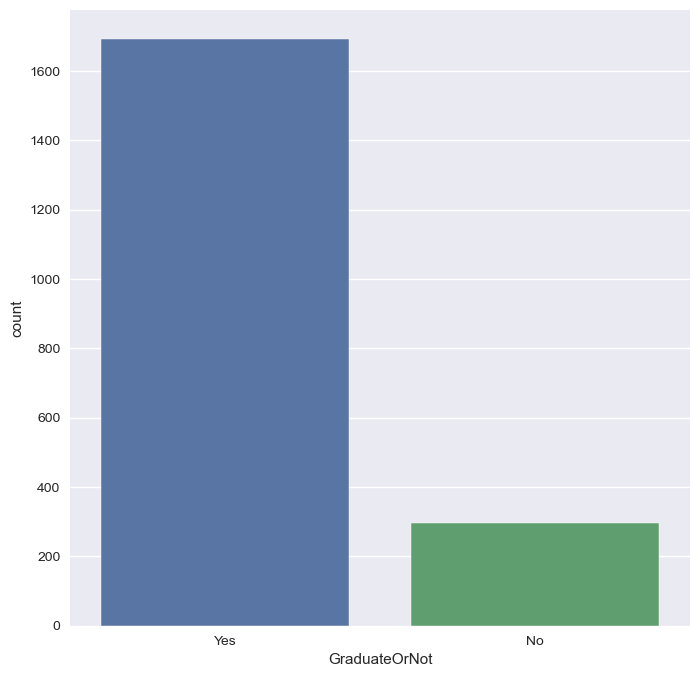

In [68]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='GraduateOrNot')
plt.show()

#vast majority graduated

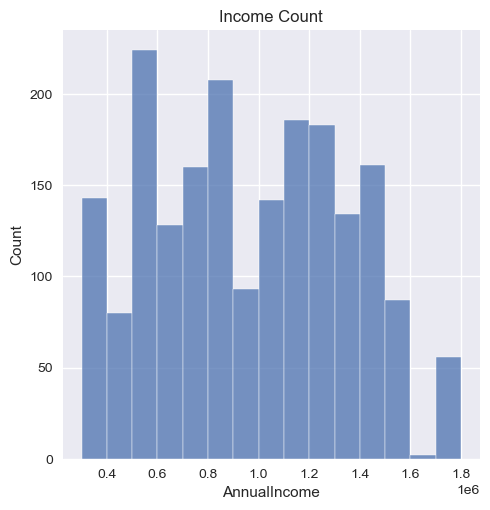

In [69]:
sns.displot(data['AnnualIncome'])
plt.title('Income Count')
plt.show()

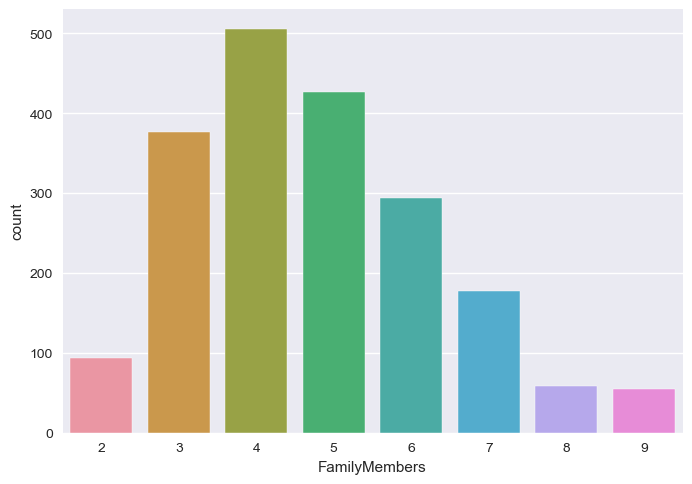

In [70]:
sns.countplot(data=data,x='FamilyMembers')
plt.show()

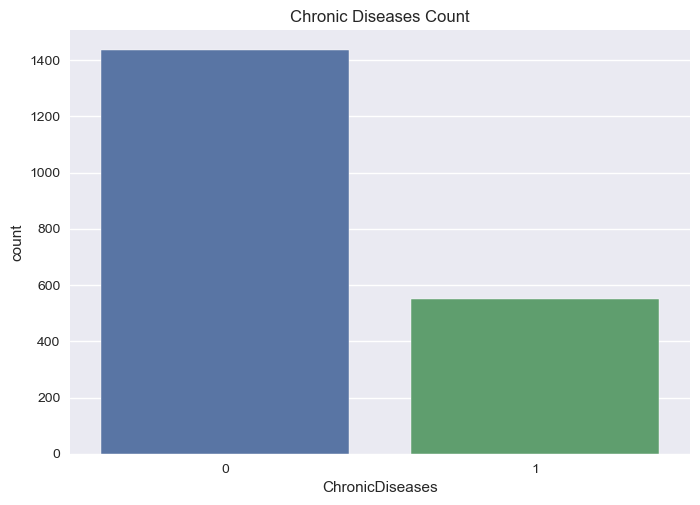

In [71]:
sns.countplot(data=data,x='ChronicDiseases')
plt.title('Chronic Diseases Count')
plt.show()

#more people have chronic diseases than those who do not

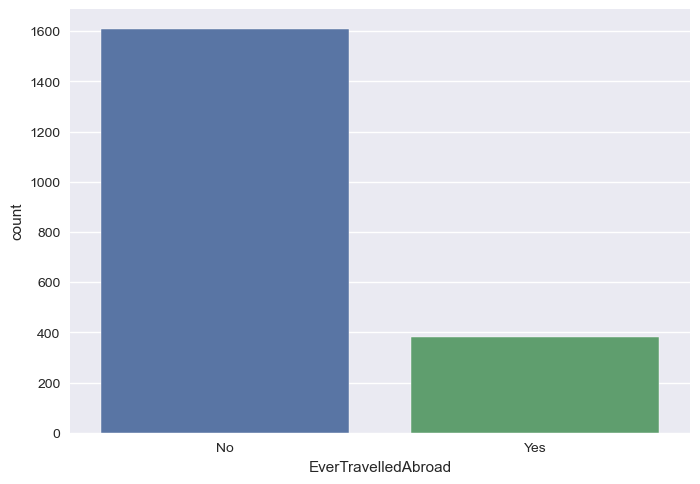

In [72]:
sns.countplot(data=data,x='EverTravelledAbroad')
plt.show()
#Many of whom have not travelled abroad

# Bivariate Analysis

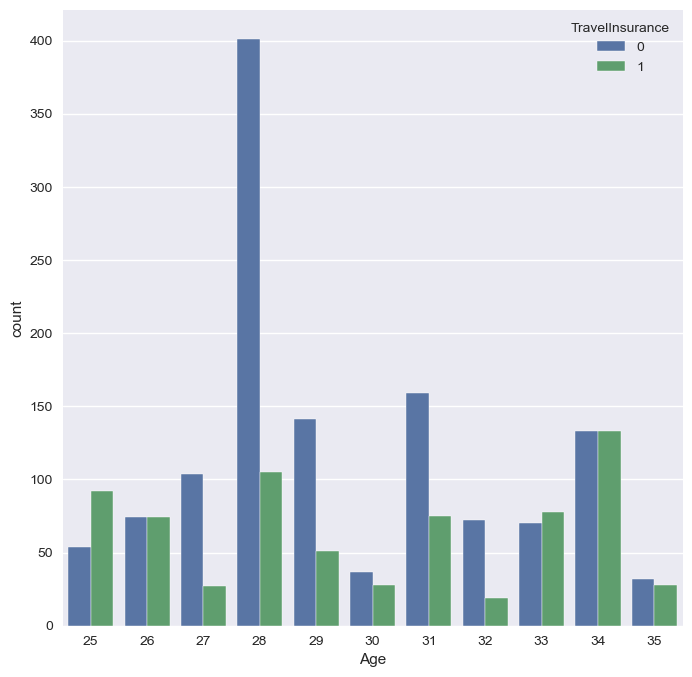

In [73]:
#breakdown of purchase by age
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='TravelInsurance',x='Age',data=data)
plt.show()

#does not show clear trend, let's have a look at percentage instead

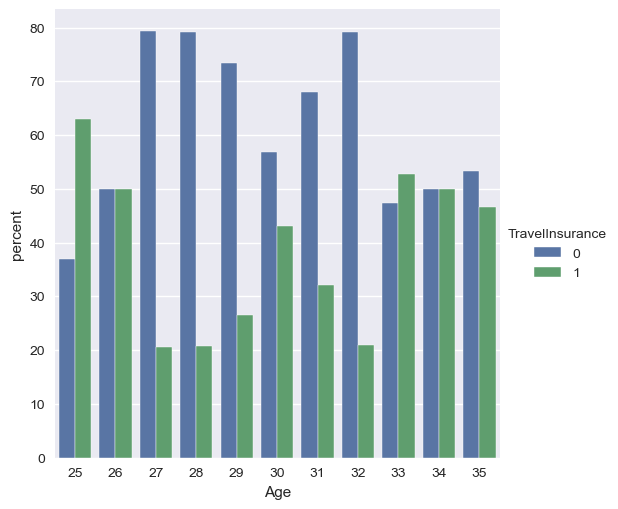

In [74]:
#normalized plot for Normalize by percentage
x,y = 'Age', 'TravelInsurance'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

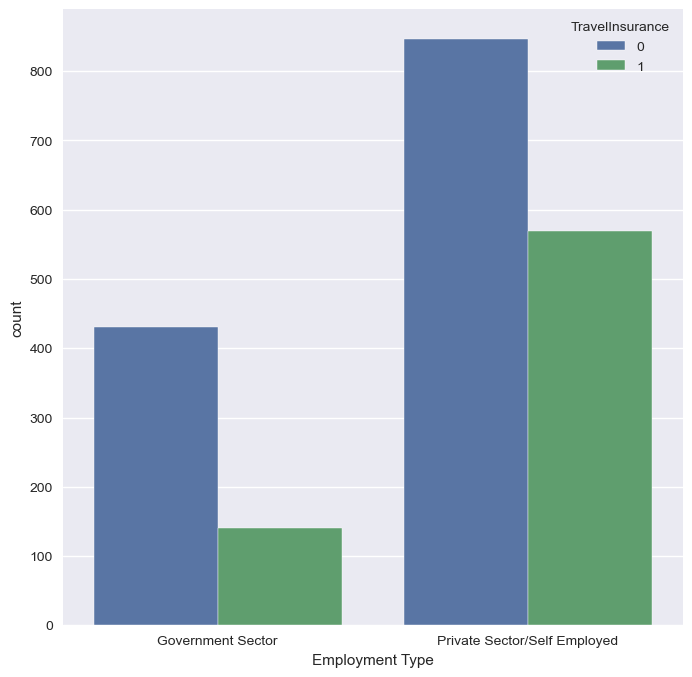

In [75]:
#breakdown of purchase by employement type
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='TravelInsurance',x='Employment Type',data=data)
plt.show()


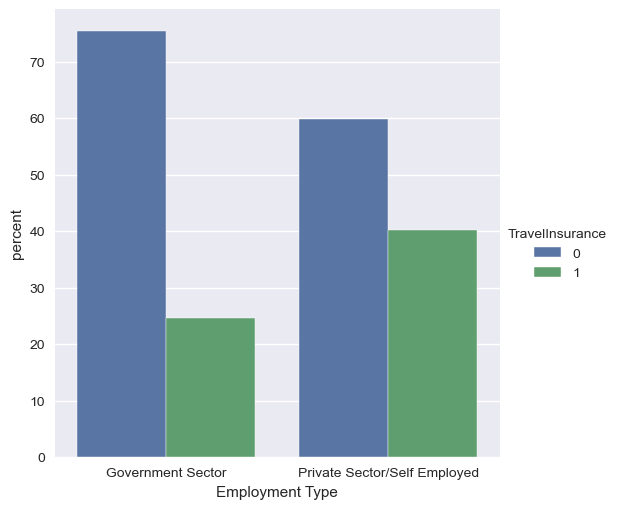

In [76]:
#normalized plot for Normalize by percentage
x,y = 'Employment Type', 'TravelInsurance'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

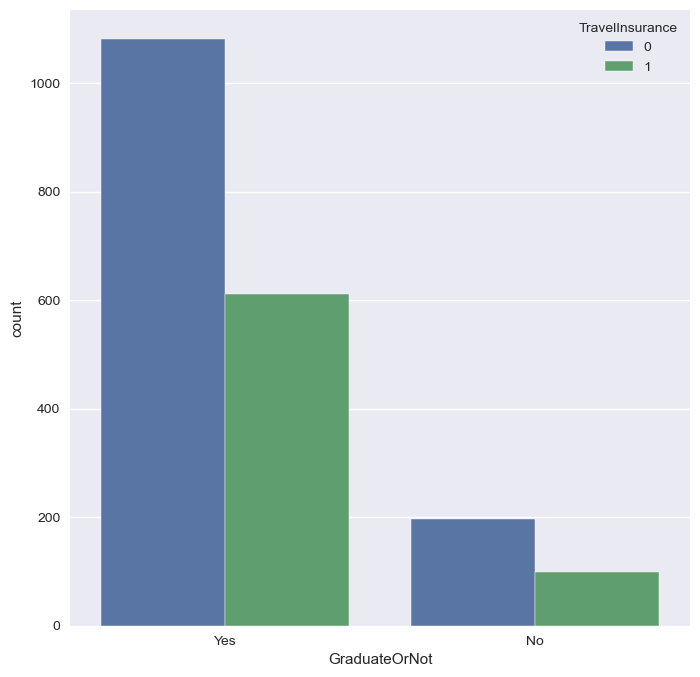

In [77]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='GraduateOrNot',hue='TravelInsurance')
plt.show()

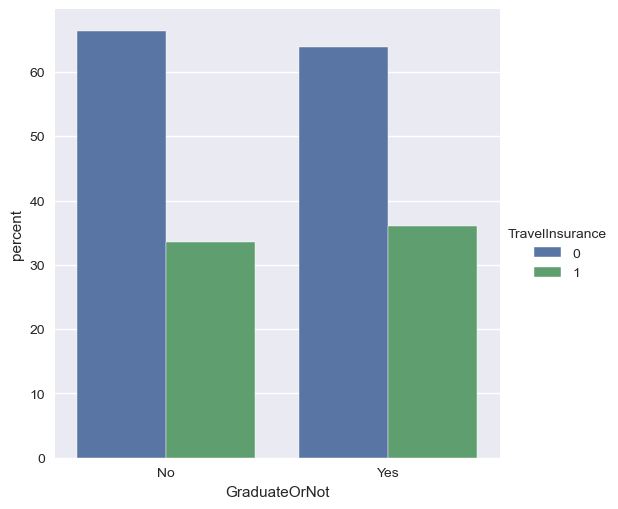

In [78]:
#normalized plot for Normalize by percentage
x,y = 'GraduateOrNot', 'TravelInsurance'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

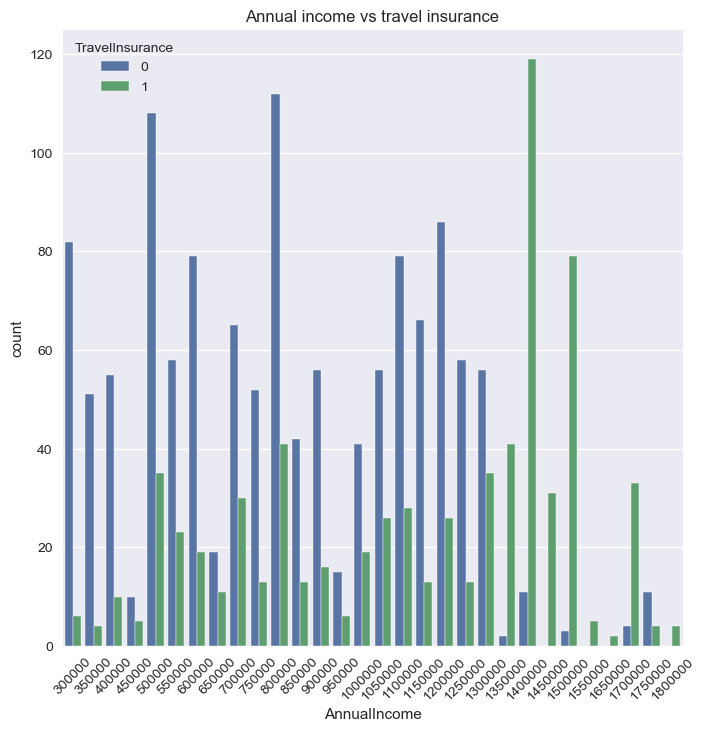

In [79]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='AnnualIncome',hue='TravelInsurance')
plt.title('Annual income vs travel insurance')
plt.xticks(rotation=45)
plt.show()

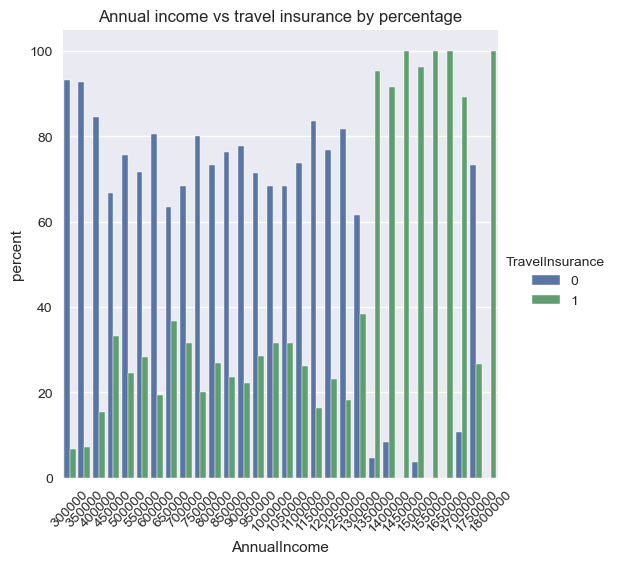

In [80]:
#normalized plot for Normalize by percentage
x,y = 'AnnualIncome', 'TravelInsurance'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)
plt.title('Annual income vs travel insurance by percentage')
plt.show()

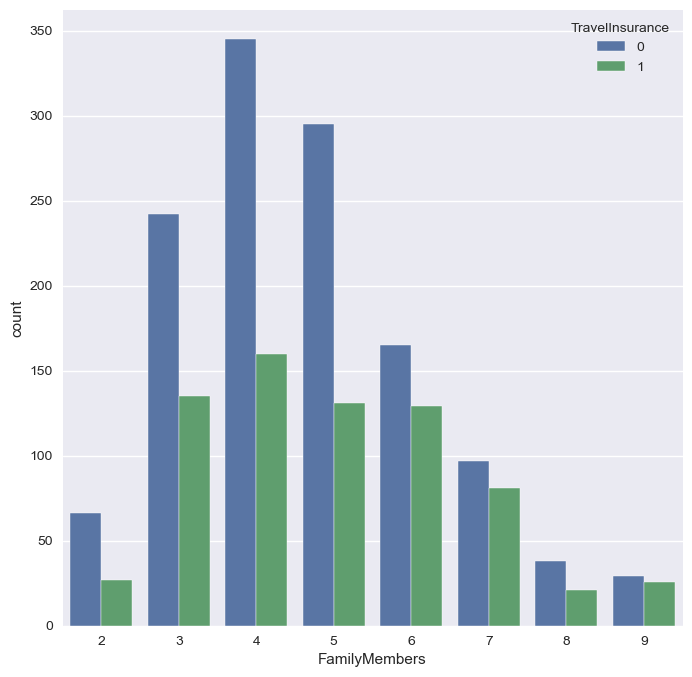

In [81]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='FamilyMembers',hue='TravelInsurance')
plt.show()

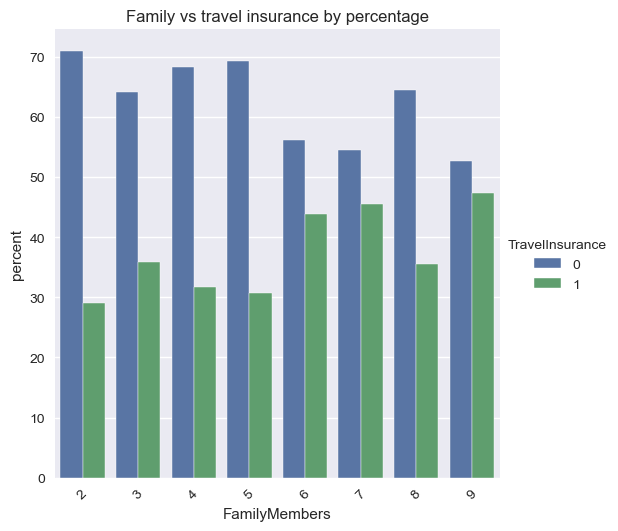

In [82]:
#normalized plot for Normalize by percentage
x,y = 'FamilyMembers', 'TravelInsurance'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)
plt.title('Family vs travel insurance by percentage')
plt.show()

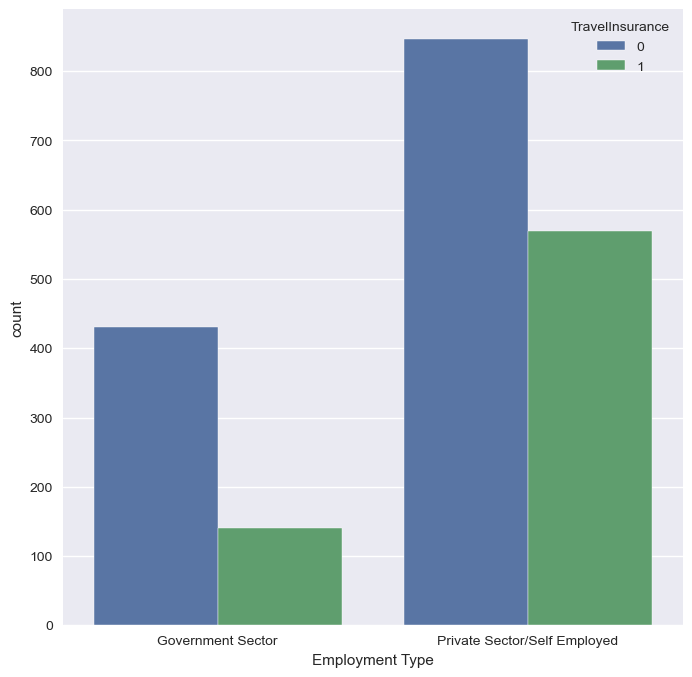

In [83]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='Employment Type',hue='TravelInsurance')
plt.show()

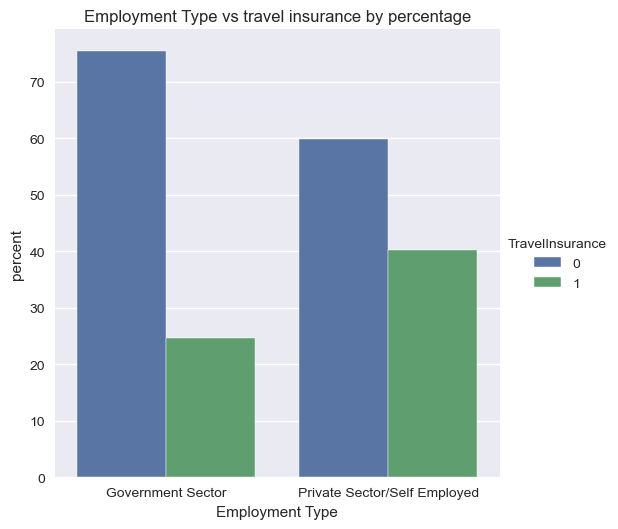

In [84]:
#normalized plot for Normalize by percentage
x,y = 'Employment Type', 'TravelInsurance'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title('Employment Type vs travel insurance by percentage')
plt.show()

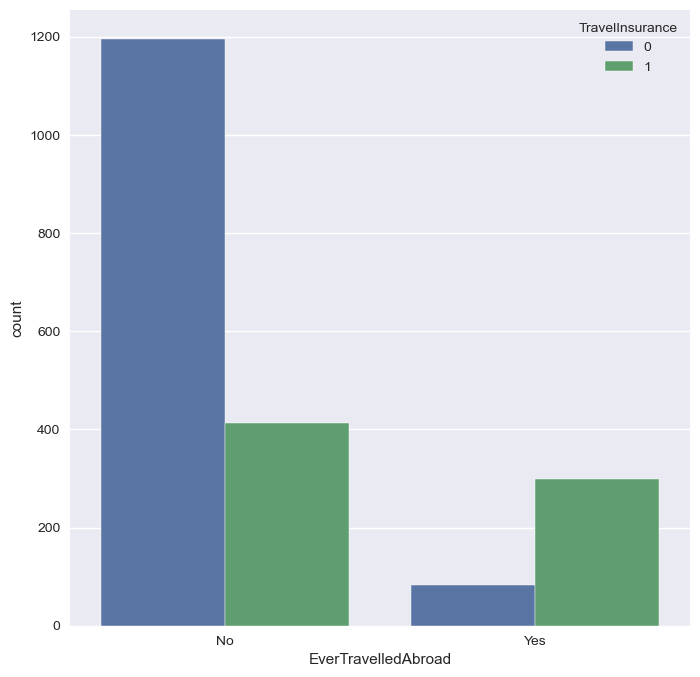

In [85]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='EverTravelledAbroad',hue='TravelInsurance')
plt.show()

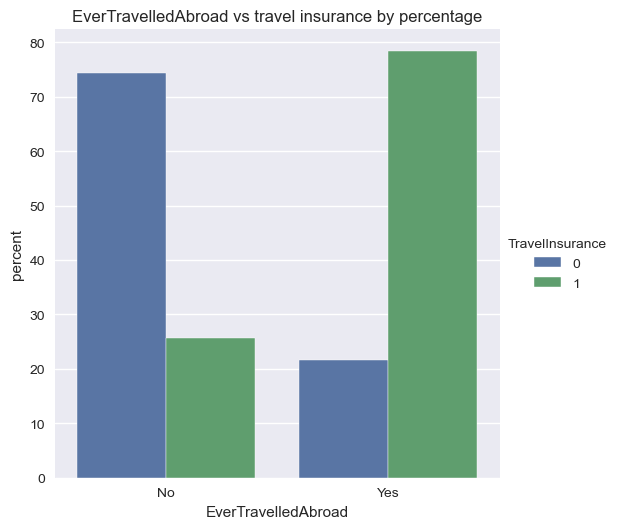

In [86]:
#normalized plot for Normalize by percentage
x,y = 'EverTravelledAbroad', 'TravelInsurance'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title('EverTravelledAbroad vs travel insurance by percentage')
plt.show()

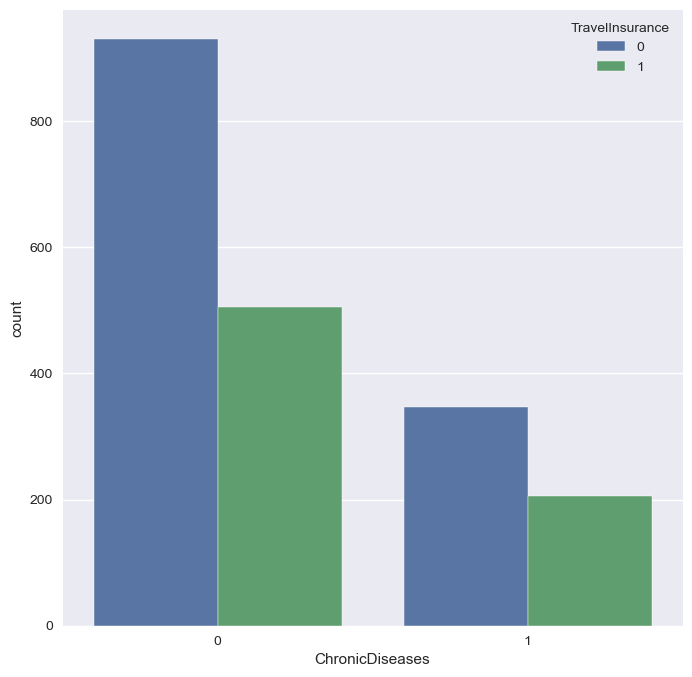

In [87]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='ChronicDiseases',hue='TravelInsurance')
plt.show()

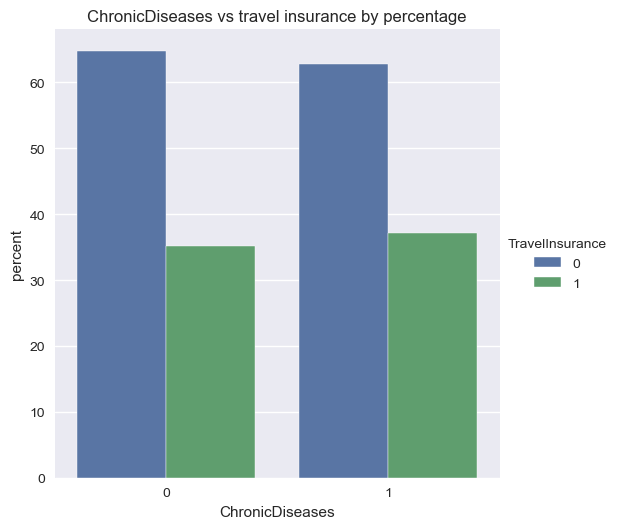

In [88]:
#normalized plot for Normalize by percentage
x,y = 'ChronicDiseases', 'TravelInsurance'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title('ChronicDiseases vs travel insurance by percentage')
plt.show()

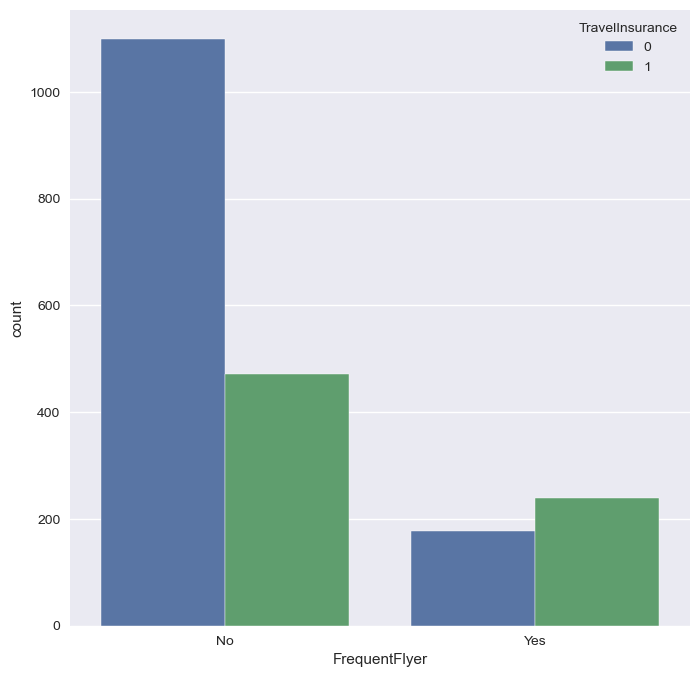

In [89]:
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(data=data,x='FrequentFlyer',hue='TravelInsurance')
plt.show()

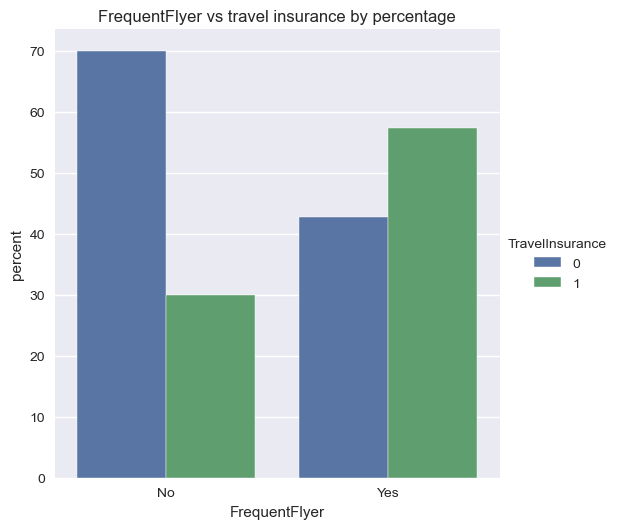

In [90]:
#normalized plot for Normalize by percentage
x,y = 'FrequentFlyer', 'TravelInsurance'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title('FrequentFlyer vs travel insurance by percentage')
plt.show()

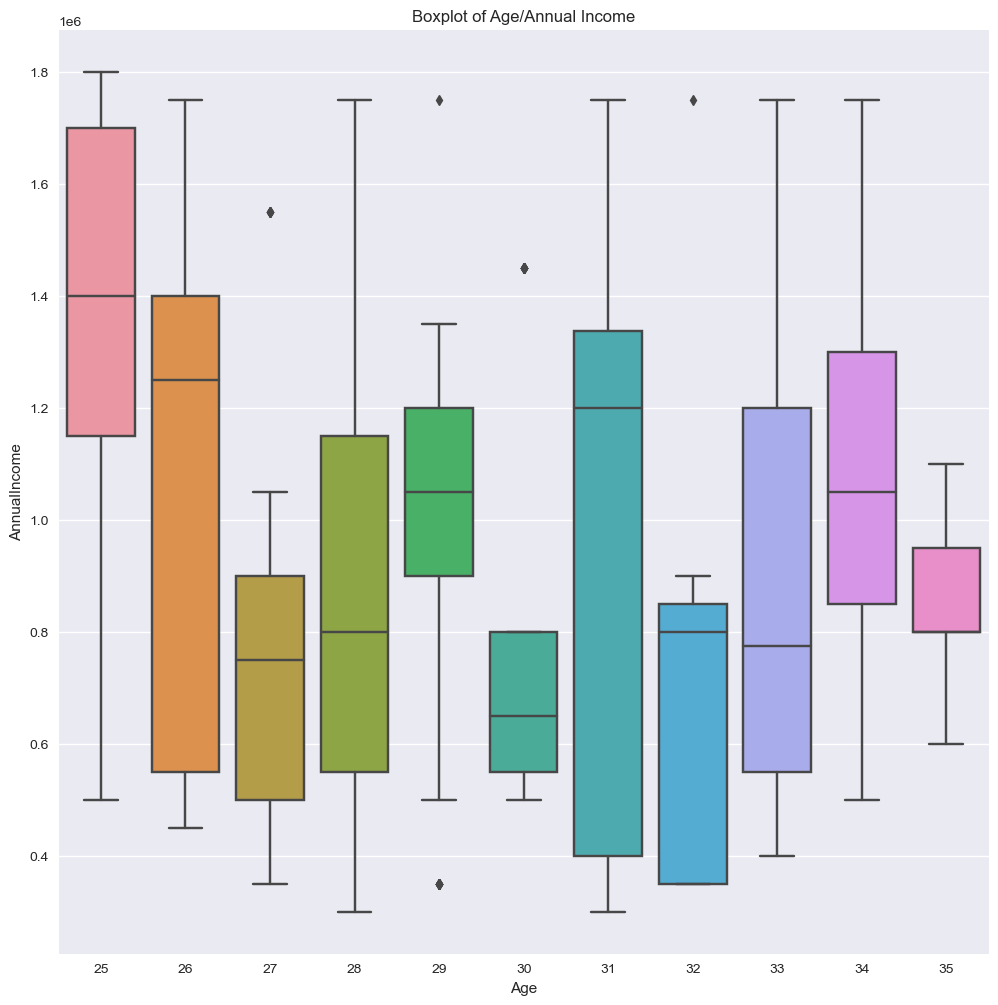

In [91]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='Age',y='AnnualIncome',data=data)
plt.title('Boxplot of Age/Annual Income')
plt.show()

#top earners seem to be 25 years old

# Multivariate Analysis

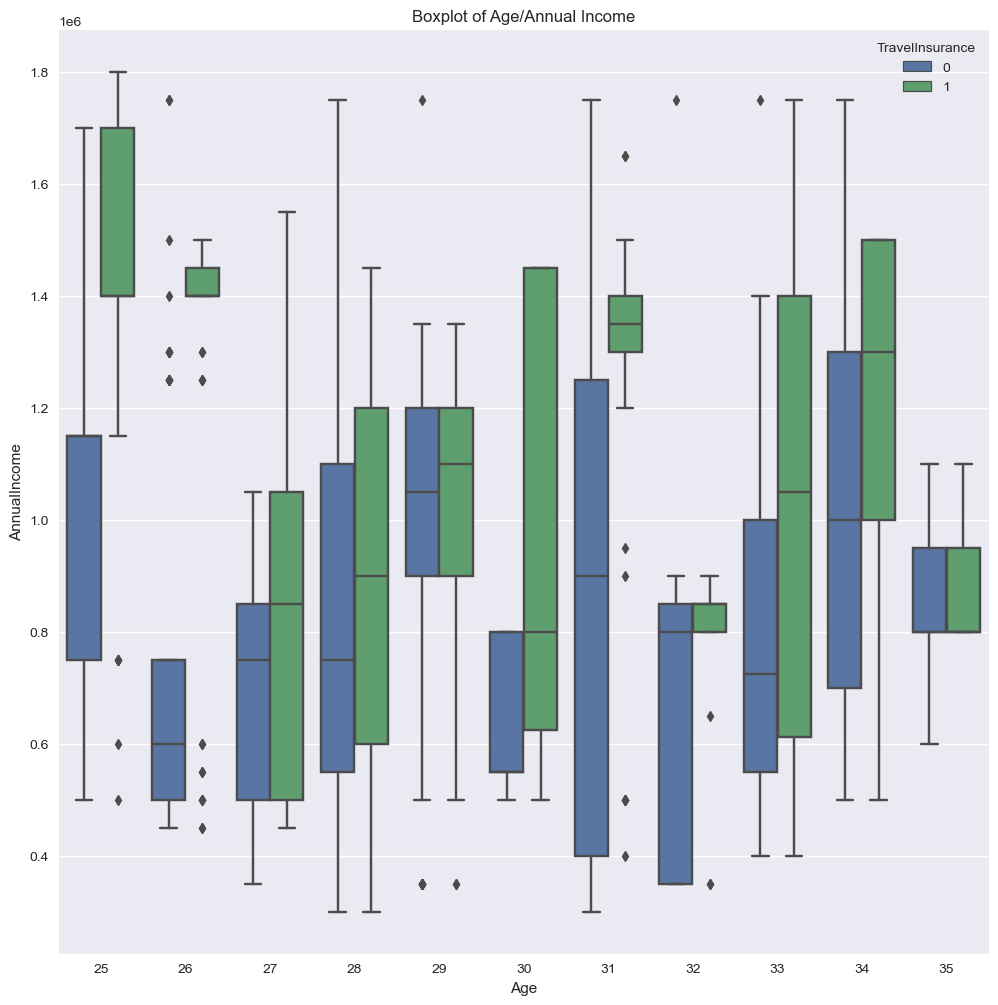

In [92]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='Age',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.title('Boxplot of Age/Annual Income')
plt.show()

#it seems that within each age group, the higher income earners seem to want to purchase insurance

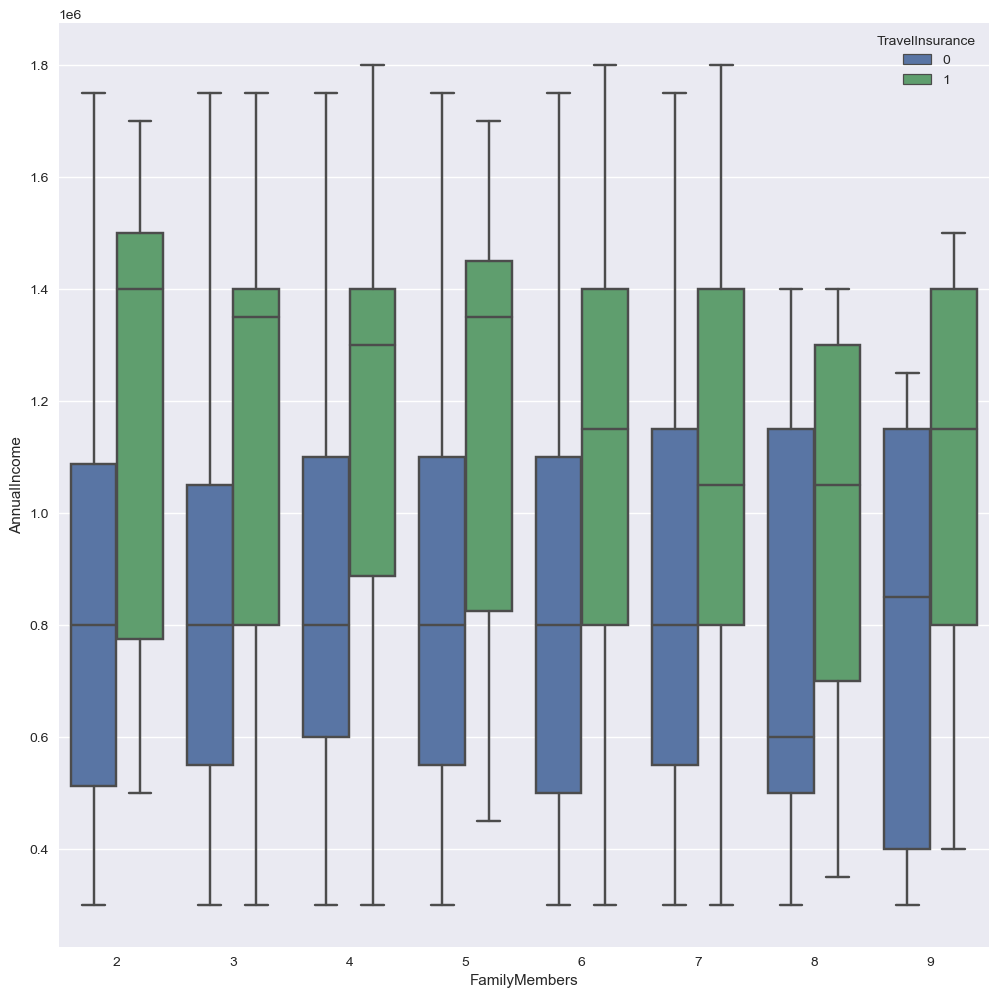

In [93]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='FamilyMembers',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.show()


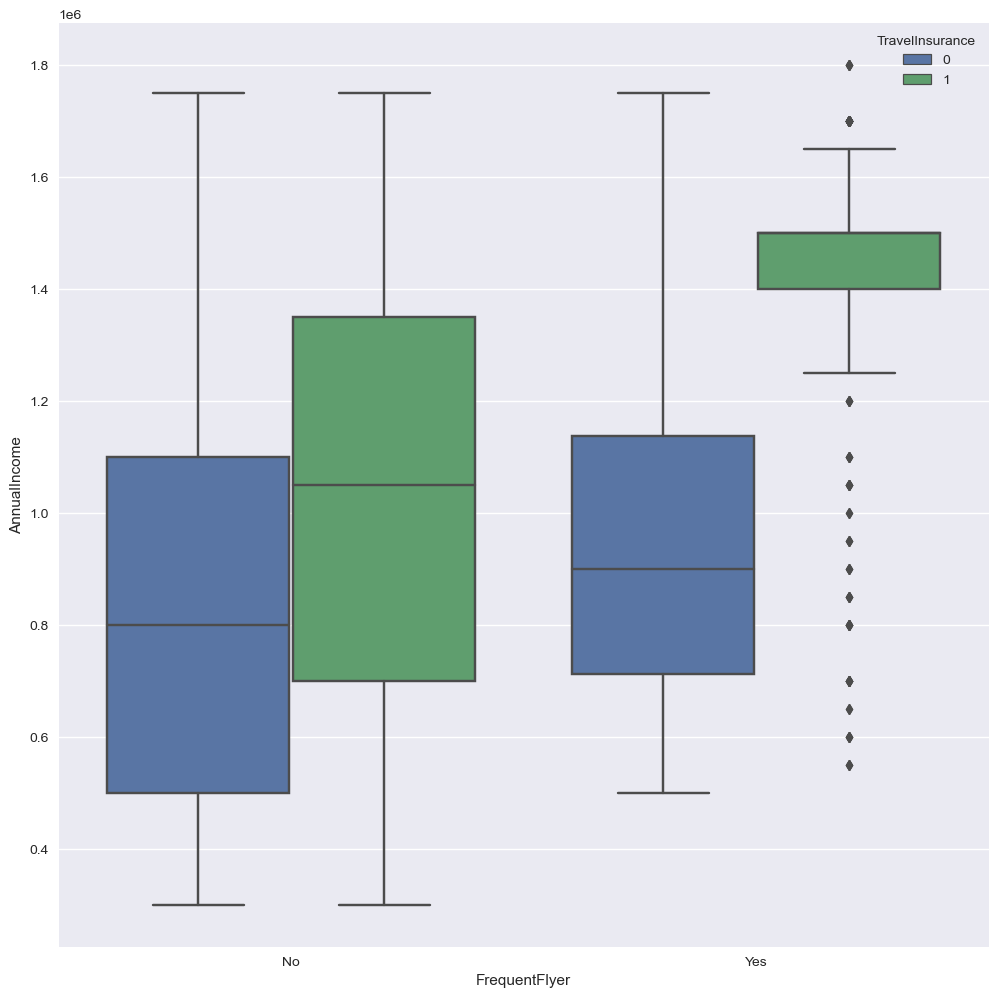

In [94]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='FrequentFlyer',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.show()

#again, income seems to be the driving factor of purchase

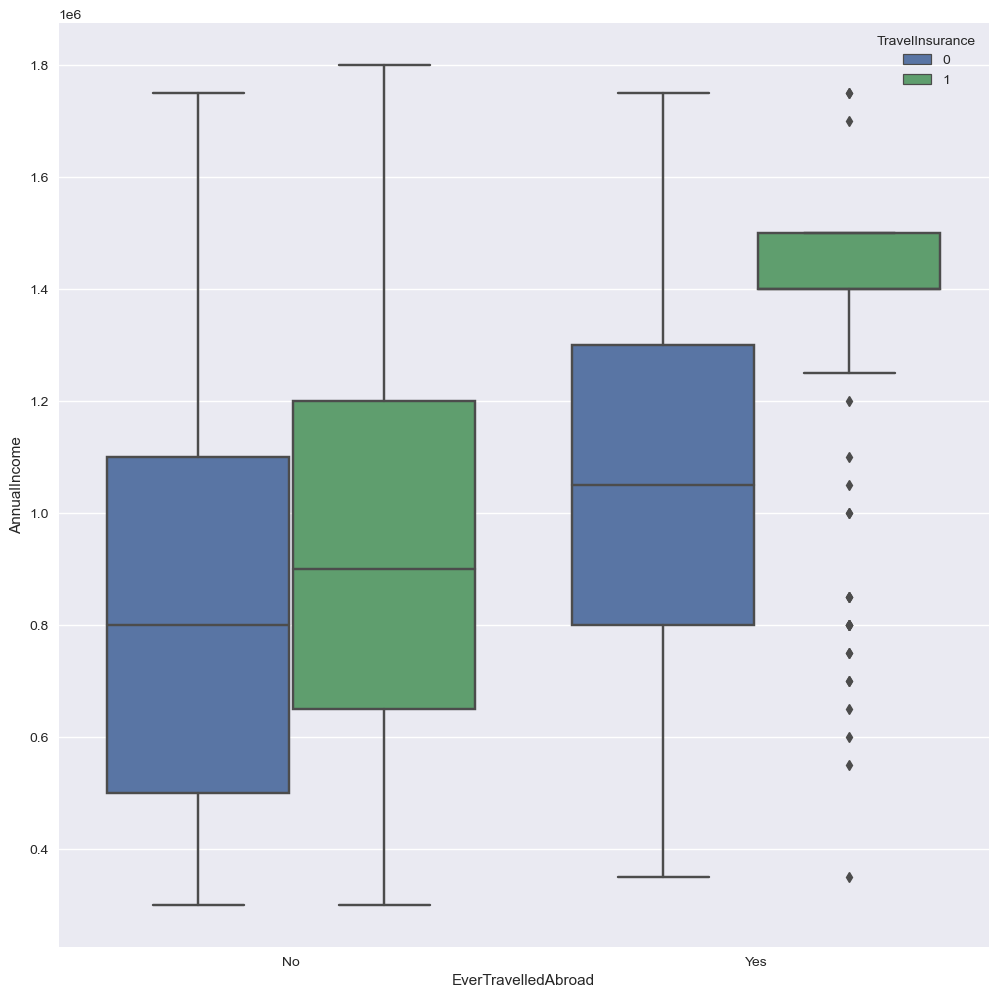

In [95]:
fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(x='EverTravelledAbroad',y='AnnualIncome',hue='TravelInsurance',data=data)
plt.show()

In [96]:
data_encode = data.copy()
data_encode['GraduateOrNot'] = data_encode['GraduateOrNot'].map({'Yes': 1, 'No': 0})
data_encode['FrequentFlyer'] = data_encode['FrequentFlyer'].map({'Yes': 1, 'No': 0})
data_encode['EverTravelledAbroad'] = data_encode['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
data_encode['Employment Type'] = data_encode['Employment Type'].map({'Government Sector': 0, 'Private Sector/Self Employed': 1})
data_encode


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


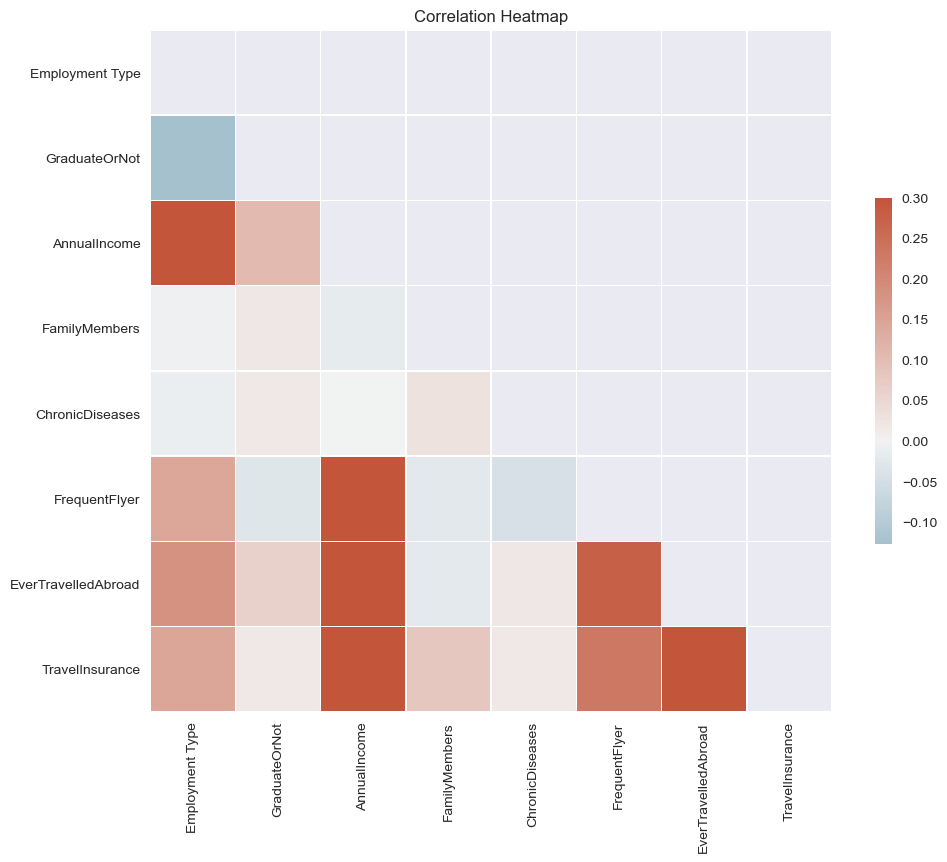

In [97]:
corr = data_encode[list(data_encode.columns)[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title("Correlation Heatmap")
plt.show()

# Prediction

In [98]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = data_encode.loc[:, data_encode.columns != 'TravelInsurance']
y = data_encode['TravelInsurance']
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 

In [99]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
as_knn = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF KNN MODEL: ", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report


ACCURACY OF KNN MODEL:  0.8291457286432161


In [100]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_knn,recall_knn,fscore_knn,support_knn = score(y_test, y_pred)

In [101]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
as_svc = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF SVM MODEL: ",metrics.accuracy_score(y_test, y_pred))

ACCURACY OF SVM MODEL:  0.6884422110552764


In [102]:
precision_svc,recall_svc,fscore_svc,support_svc = score(y_test, y_pred)

In [103]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
as_random_forest = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE RANDOM FOREST MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE RANDOM FOREST MODEL:  0.8190954773869347


In [104]:
precision_rf,recall_rf,fscore_rf,support_rf = score(y_test, y_pred)

In [105]:
from sklearn import linear_model
logit_model=linear_model.LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)
as_log_reg = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE LOGISTIC REGRESSION MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE LOGISTIC REGRESSION MODEL:  0.6457286432160804


In [106]:
precision_lr,recall_lr,fscore_lr,support_lr = score(y_test, y_pred)

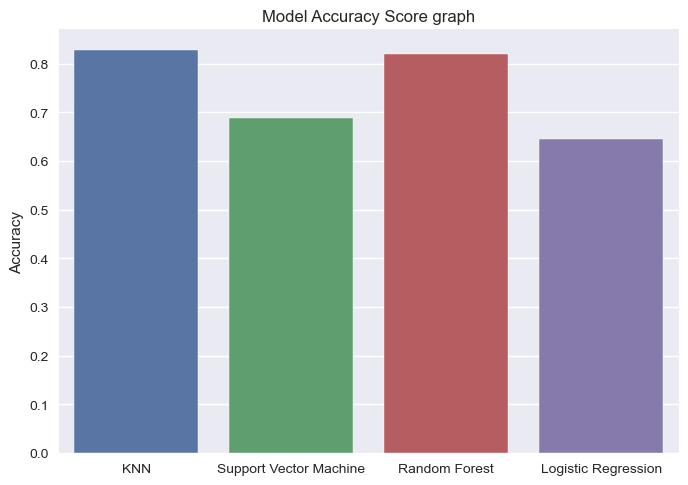

In [107]:
x_label = ['KNN',"Support Vector Machine",'Random Forest','Logistic Regression']
y_label = [as_knn,as_svc,as_random_forest,as_log_reg]
sns.barplot(x_label,y_label)
plt.title('Model Accuracy Score graph')
plt.ylabel("Accuracy")
plt.show()

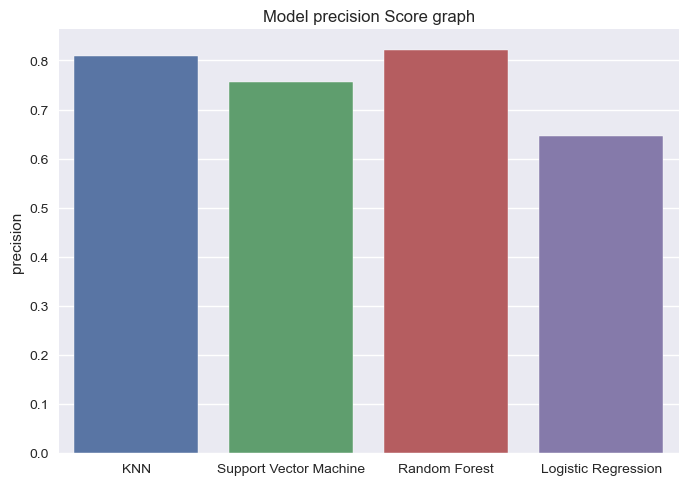

In [112]:
x_label = ['KNN',"Support Vector Machine",'Random Forest','Logistic Regression']
y_label = [precision_knn[0],precision_svc[0],precision_rf[0],precision_lr[0]]
sns.barplot(x_label,y_label)
plt.title('Model Precision Score graph')
plt.ylabel("precision")
plt.show()

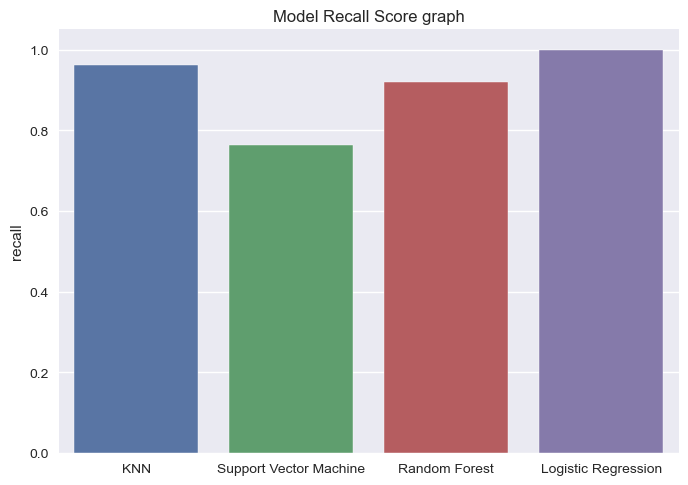

In [113]:
x_label = ['KNN',"Support Vector Machine",'Random Forest','Logistic Regression']
y_label = [recall_knn[0],recall_svc[0],recall_rf[0],recall_lr[0]]
sns.barplot(x_label,y_label)
plt.title('Model Recall Score graph')
plt.ylabel("recall")
plt.show()